In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
df= pd.read_csv(r"data_science_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
#checking Null value
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
#changing Dtype of year because we don't need it in describe() function
df.work_year=df.work_year.astype("object")

In [6]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,3.755000e+03,3755.000000,3755.000000
mean,1.906956e+05,137570.389880,46.271638
std,6.716765e+05,63055.625278,48.589050
min,6.000000e+03,5132.000000,0.000000
25%,1.000000e+05,95000.000000,0.000000
50%,1.380000e+05,135000.000000,0.000000
75%,1.800000e+05,175000.000000,100.000000
max,3.040000e+07,450000.000000,100.000000


In [7]:
#checking duplicate rows in dataset
df.duplicated().sum()

1171

In [8]:
#drop duplicates rows
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.reset_index(drop=True)

In [11]:
#checking how many unique value is present
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

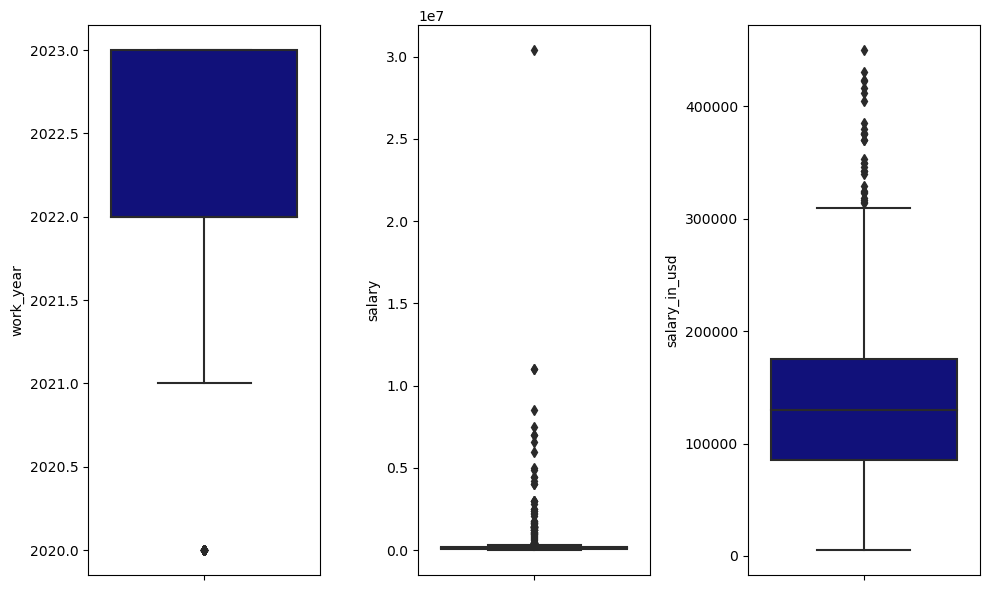

In [12]:
#checking outlier in dataset
numerical_columns = ['work_year', 'salary', 'salary_in_usd']
plt.figure(figsize=(10,6))

# plotting
for i in range(0, len(numerical_columns)):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=df[numerical_columns[i]], color='darkblue')
    plt.tight_layout()

# 1. Calculate the percentage of salary increase for each job title based on experience level.

                    job_title experience_level  percentage_increase
0          Analytics Engineer               EN                  NaN
1          Analytics Engineer               EX                34.71
2          Analytics Engineer               MI               -41.48
3          Analytics Engineer               SE                52.74
4                Data Analyst               EN                  NaN
5                Data Analyst               EX               109.26
6                Data Analyst               MI               -20.79
7                Data Analyst               SE                28.41
8              Data Architect               EX                  NaN
9              Data Architect               MI                -7.58
10             Data Architect               SE                 9.11
11              Data Engineer               EN                  NaN
12              Data Engineer               EX               175.88
13              Data Engineer               MI  

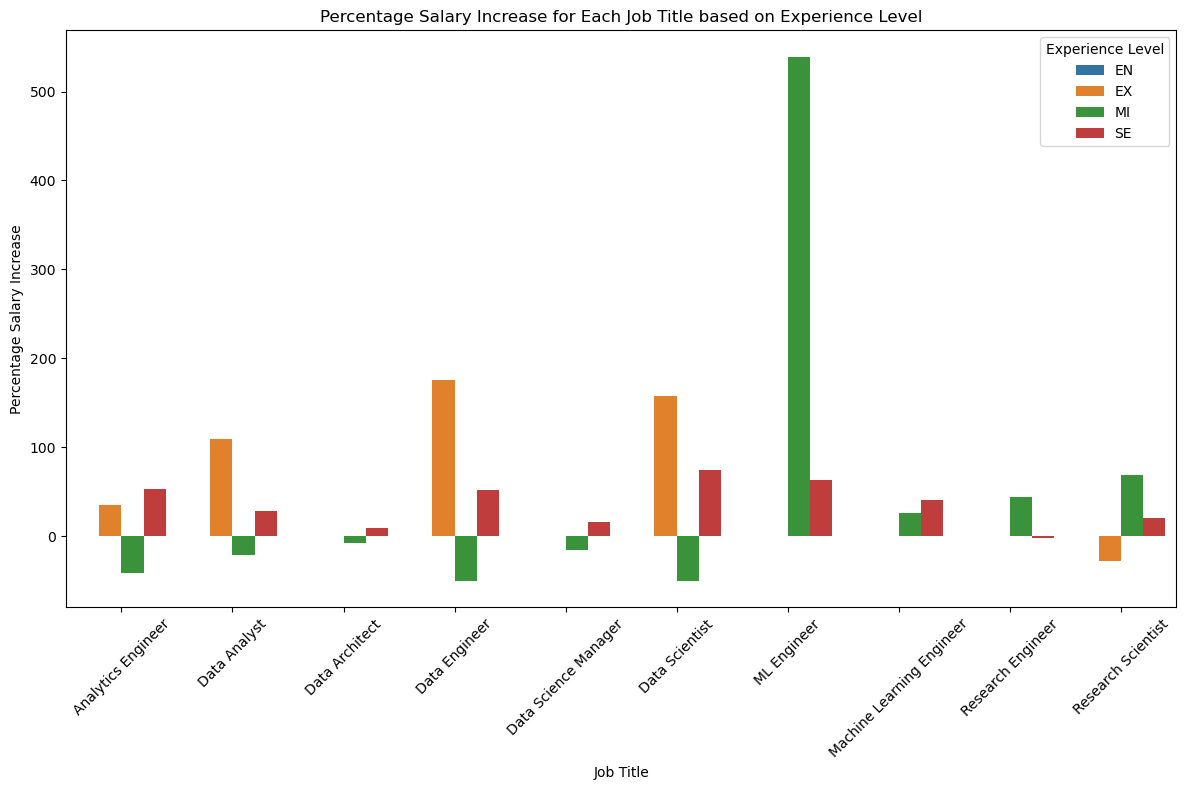

In [13]:
#Here 93 unique job_title is present so visualizating in jupyter is difficult so we tak only top 10 to visualize
top_job_titles = df['job_title'].value_counts().head(10).index

# Filter the data for the selected job titles
top_job_titles_data = df[df['job_title'].isin(top_job_titles)]

# Group the filtered data by job title and experience level, calculate average salary and percentage increase
average_salary = top_job_titles_data.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()
average_salary['percentage_increase'] = (average_salary.groupby('job_title')['salary_in_usd'].pct_change() * 100).round(2)
print(average_salary[['job_title', 'experience_level', 'percentage_increase']])

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title', y='percentage_increase', hue='experience_level', data=average_salary)
plt.xlabel('Job Title')
plt.ylabel('Percentage Salary Increase')
plt.title('Percentage Salary Increase for Each Job Title based on Experience Level')
plt.legend(title='Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Figure out if the place of residence influences changes in pay. If YES, then by how much?

In [14]:
# Calculate the average salary for each place of residence
average_salary_residence = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Calculate the percentage difference in salary compared to the overall average salary
overall_average_salary = df['salary_in_usd'].mean()
average_salary_residence['percentage_difference'] = ((average_salary_residence['salary_in_usd'] - overall_average_salary) / overall_average_salary) * 100

print(average_salary_residence[['employee_residence', 'percentage_difference']])

   employee_residence  percentage_difference
0                  AE             -25.042696
1                  AM             -62.521348
2                  AR             -73.390157
3                  AS             -75.430870
4                  AT             -46.685993
..                ...                    ...
73                 TR             -85.714637
74                 UA             -56.637200
75                 US              15.413415
76                 UZ             -22.793977
77                 VN             -74.914289

[78 rows x 2 columns]


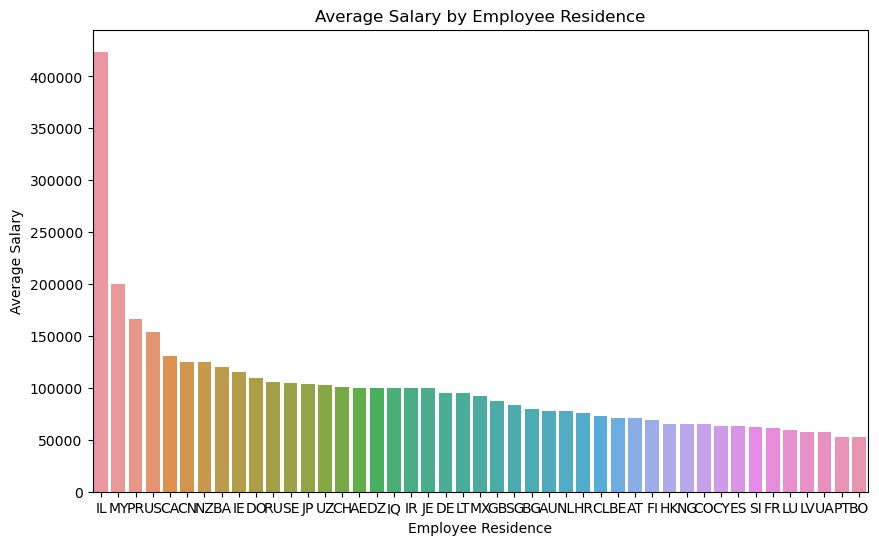

In [15]:
#Here 78 unique job_title is present so visualizating in jupyter is difficult so we tak only top 56 to visualize
top_ten_residences = average_salary_residence.nlargest(45, 'salary_in_usd')
plt.figure(figsize=(10, 6))
sns.barplot(x='employee_residence', y='salary_in_usd', data=top_ten_residences)
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary')
plt.title('Average Salary by Employee Residence')
plt.show()

# 3. Analyse if company size has an impact on salary. If YES, then by how much?

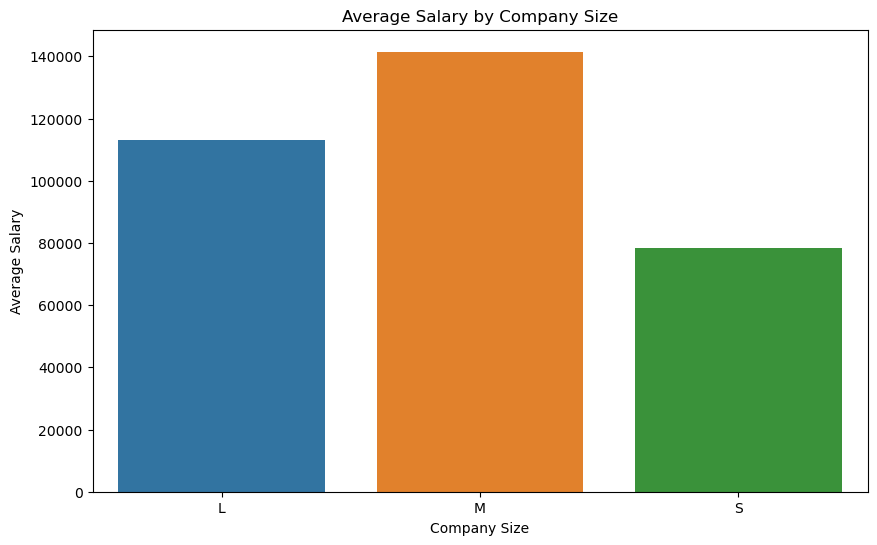

In [16]:
avg_salary_company_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Plotting the average salary for each company size
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=avg_salary_company_size)
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')
plt.show()

Observation: Medium size of company has average salary is larger than Large and small company

# 4. Conduct statistical analysis on the salary for each job title, including measures of central tendency, maximum, and minimum salary values.

In [17]:
salary_stats = (df.groupby('job_title')['salary_in_usd'].agg(['mean', 'median','max', 'min']).reset_index()).round(2)
# salary_stats['mode'] = df.groupby('job_title')['salary_in_usd'].agg(lambda x: x.mode().iloc[0])
# salary_stats = salary_stats.reset_index()
salary_stats


,job_title,mean,median,max,min
0,3D Computer Vision Researcher,21352.25,15000.0,50000,5409
1,AI Developer,136666.09,108000.0,300000,6304
2,AI Programmer,55000.00,55000.0,70000,40000
3,AI Scientist,110120.88,52500.0,423834,12000
4,Analytics Engineer,150151.75,143860.0,289800,7500
...,...,...,...,...,...
88,Research Engineer,165909.39,155000.0,293000,60000
89,Research Scientist,153486.37,145900.0,450000,23000
90,Software Data Engineer,62510.00,62510.0,75020,50000
91,Staff Data Analyst,15000.00,15000.0,15000,15000


# 5. Perform data visualization and gather various unique insights from the data. (Open Ended question)

In [18]:
# Renaming the column value

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Employment Type
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Remote Ratio
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Company Size
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Remote,ES,Large
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,US,Remote,US,Small
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,US,Remote,US,Small
3,2023,Senior-level,Full-time,Data Scientist,175000,USD,175000,CA,Remote,CA,Medium
4,2023,Senior-level,Full-time,Data Scientist,120000,USD,120000,CA,Remote,CA,Medium


Text(0.5, 1.0, 'Variation of remote ratio from 2020-2023')

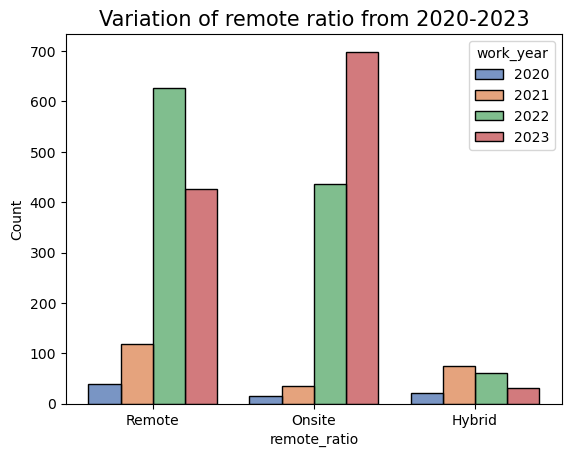

In [19]:
sns.histplot(data = df, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink = 0.8,palette='deep')
plt.title('Variation of remote ratio from 2020-2023', fontsize = 15)

Observations:
    From 2020 to 2023 there will be an increase in the rate of onsite work by Data Science workers.
    From 2021 to 2023 there will be an decrease in the rate of hybrid work by Data Science workers.

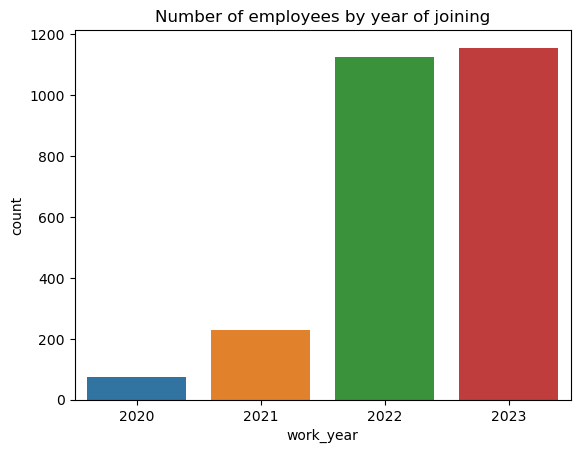

In [20]:
sns.countplot(x=df['work_year'], data=df)
plt.title('Number of employees by year of joining')
plt.show()

Observations:
    Almost 1150 employees are estimated to join in 2023
    Number of employees by year of joining is increase in every year.

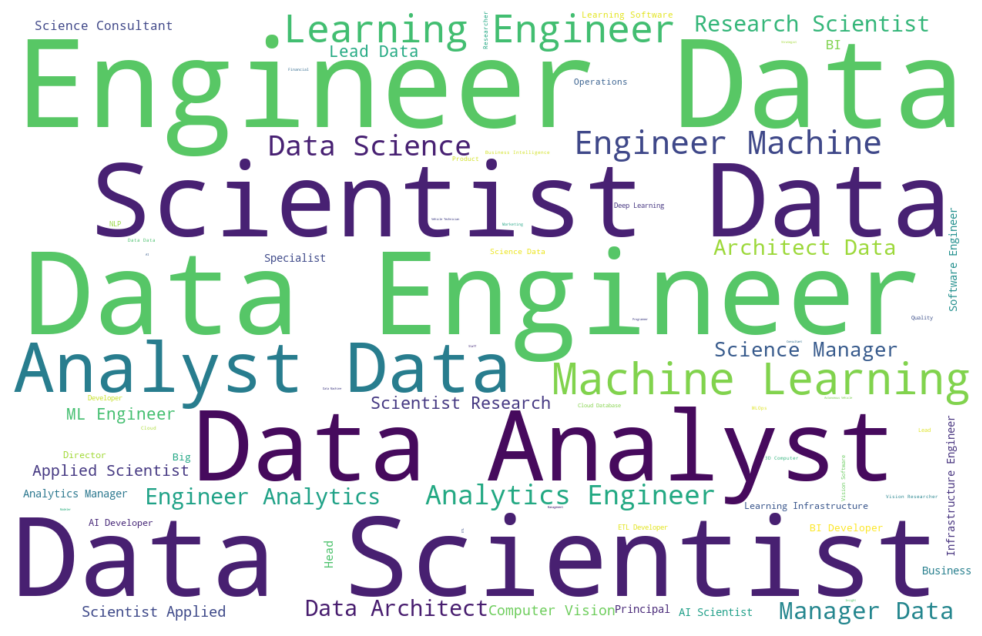

In [21]:
from wordcloud import WordCloud,STOPWORDS

fig = plt.gcf()
fig.set_size_inches(15,8)
wc = WordCloud(stopwords=STOPWORDS,
              background_color='white',
              contour_width=3,
              contour_color='red',
              width=1250,
              height=800,
              max_words=250,
              max_font_size=250,
              random_state=42
              )

wc.generate(' '.join(df['job_title']))
fig= plt.imshow(wc, interpolation= "bilinear")
fig= plt.axis('off')

Observations:
      Data scientist, Data engineer, Data Analyst are the most popular titles.